In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.disable_eager_execution()
sess = tf.InteractiveSession()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
X =np.expand_dims(np.arange(0.0,3.0,.01),1)
Y =np.tanh(X)
x = tf.placeholder(tf.float64, [300,1],name='x')
y = tf.placeholder(tf.float64, [300,1],name='y')


input_layer = tf.layers.dense(x, 300, activation= tf.nn.relu)

hidden_layer1 = tf.layers.dropout(input_layer,.2)
hidden_layer2 = tf.layers.dense(hidden_layer1,250,activation=tf.nn.relu)

output_layer = tf.layers.dense(hidden_layer2,1)

Loss =tf.losses.mean_squared_error(y , output_layer)
Optimizer = tf.train.AdamOptimizer(learning_rate= 0.001).minimize(Loss)
init = tf.global_variables_initializer()
loss_list=[]
sess.run(init)

for i in range(0,1000):
  fd ={x:X, y:Y}
  _, loss_val = sess.run([Optimizer, Loss], feed_dict=fd)
  #print ('loss = %s' % loss_val)
  loss_list.append(loss_val)
YP = sess.run(output_layer,feed_dict={x:X})


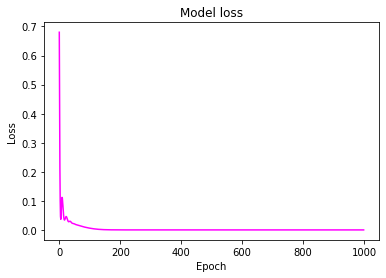

In [5]:

# Plot training  loss values
plt.plot(loss_list,color='magenta')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


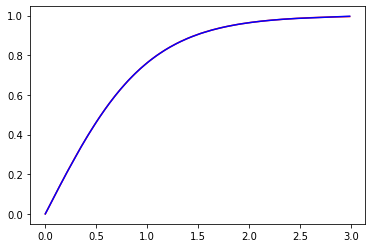

In [6]:
plt.plot(X,Y,color='red')
plt.plot(X,YP,color='blue')
plt.show()
